<a href="https://colab.research.google.com/github/yashkr95/Machine-Learning-Projects/blob/main/Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting google drive in the colab notebook**

In [21]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Importing all the libraries**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [67]:
#loading the data from csv file to Pandas DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/DataSets/Sales Prediction/Train.csv')

In [68]:
#Showing the 5 rows of the data
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [69]:
# total no. of rows and coloumns 
df_train.shape

(8523, 12)

In [70]:
# fetching the information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [71]:
# checking for missing values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Handling Missing Values**

Mean - average

Mode - most repeated values

In [72]:
# mean value of "Item_Weight" column
df_train['Item_Weight'].mean()

12.857645184136183

In [73]:
# filling the missing values in the 'Item_Weight' col.
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)

In [74]:
# Checking that missing values has been filled or not
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [75]:
# Replacing the missing values in 'Outlet_Size'
mode_Outlet_size = df_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [76]:
print(mode_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [77]:
# missing values of 'Outlet_Size'
m_values = df_train['Outlet_Size'].isnull()
print(m_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [78]:
df_train.loc[m_values, 'Outlet_Size'] = df_train.loc[m_values,'Outlet_Type'].apply(lambda x: mode_Outlet_size[x])

In [79]:
#checking for missing values
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Data Analysis**

In [80]:
#statistical measure of the data
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Graphical Representation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


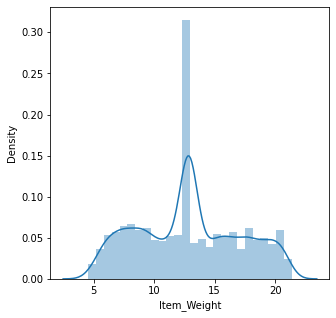

In [81]:
# Graph of 'Item_Weight' (Distribution) 
plt.figure(figsize=(5,5))
sns.distplot(df_train['Item_Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


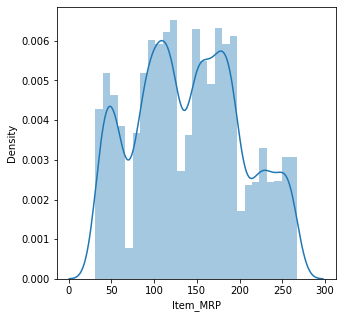

In [82]:
# Graph of 'Item MRP' (distribution)
plt.figure(figsize=(5,5))
sns.distplot(df_train['Item_MRP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


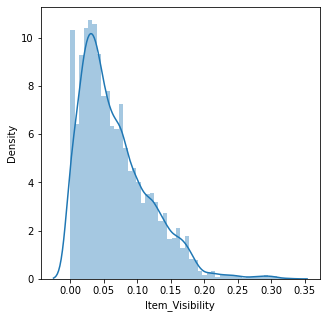

In [83]:
# Graph of 'Item Visibility' (distribution)
plt.figure(figsize=(5,5))
sns.distplot(df_train['Item_Visibility'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


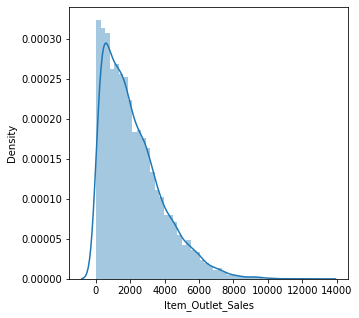

In [84]:
# Graph of 'Item_Outlet_Sales' (distribution)
plt.figure(figsize=(5,5))
sns.distplot(df_train['Item_Outlet_Sales'])
plt.show()

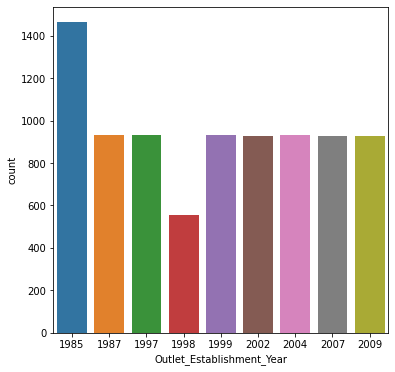

In [85]:
# Graph of 'Outlet_Establishment_Year' (countplot)
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df_train)
plt.show()

**More Graphical Representation of the data**

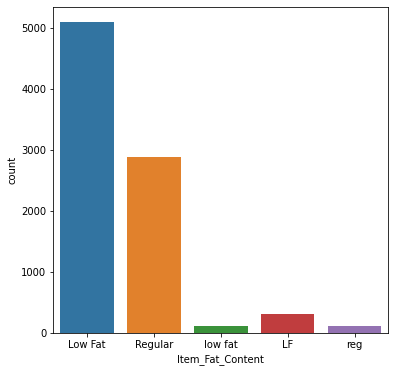

In [86]:
# Graph of 'Item_Fat_Content'
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df_train)
plt.show()

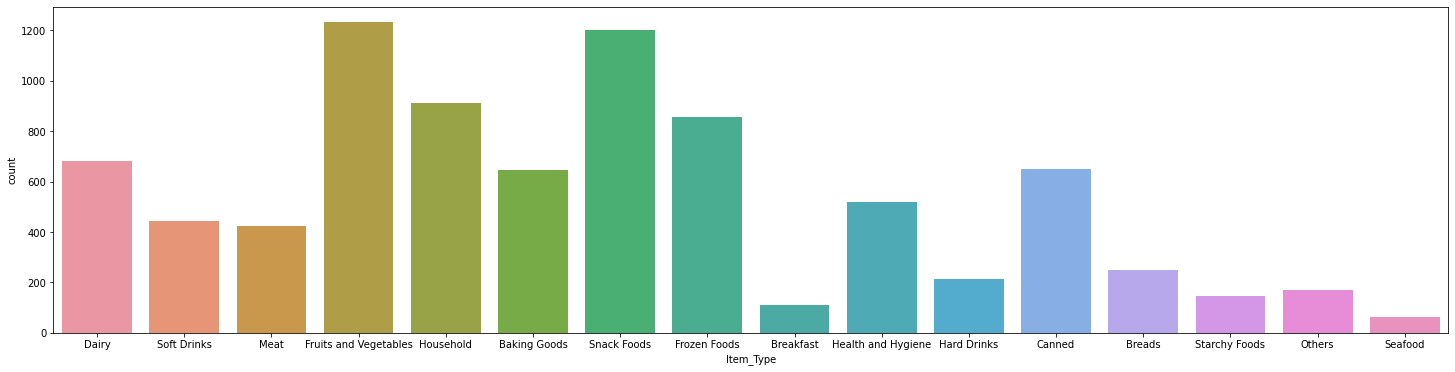

In [87]:
# Graph of 'Item_Type'
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=df_train)
plt.show()

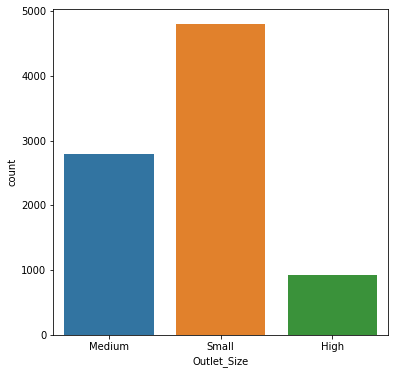

In [88]:
# Graph of 'Outlet_Size'
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df_train)
plt.show()

**Data Pre-Processing**

Preparing our data to train a machine learning model. (Scaling all the data into numerical).

In [89]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [90]:
# Checking the extra's
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [91]:
# Removing extra coloumns 
df_train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [92]:
# Checking that extra columns are merged into one or not.
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Label-Encoding**

In [93]:
encoder = LabelEncoder()

In [94]:
df_train['Item_Identifier'] = encoder.fit_transform(df_train['Item_Identifier'])

df_train['Item_Fat_Content'] = encoder.fit_transform(df_train['Item_Fat_Content'])

df_train['Item_Type'] = encoder.fit_transform(df_train['Item_Type'])

df_train['Outlet_Identifier'] = encoder.fit_transform(df_train['Outlet_Identifier'])

df_train['Outlet_Size'] = encoder.fit_transform(df_train['Outlet_Size'])

df_train['Outlet_Location_Type'] = encoder.fit_transform(df_train['Outlet_Location_Type'])

df_train['Outlet_Type'] = encoder.fit_transform(df_train['Outlet_Type'])

In [95]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**Splitting the data**

In [97]:
X = df_train.drop(columns='Item_Outlet_Sales', axis=1) # if removing coloumn axis =1, if removing row axis = 0
Y = df_train['Item_Outlet_Sales']

In [98]:
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]


In [99]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


**Splitting the dataset into test and train**

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

In [144]:
# Checking out the data of each dataframe.
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (5966, 11) (2557, 11)


In [145]:
regr = XGBRegressor()

In [146]:
regr.fit(X_train, Y_train)

[12:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

**Evaluation**

In [147]:
# prediction on training data
train_data_prediction = regr.predict(X_train)

In [148]:
# R squared Value
r2_train = metrics.r2_score(Y_train, train_data_prediction)

In [149]:
print('R Squared value = ', r2_train)

R Squared value =  0.6414667766888446


In [150]:
# prediction on test data
test_data_prediction = regr.predict(X_test)

In [151]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [152]:
print('R Squared value = ', r2_test)

R Squared value =  0.5786418433750373
